# importing Libraries that We use in this project

In [30]:
import pandas as pd
import math
import numpy as np

import sklearn as sk
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model 
import matplotlib.pyplot as plot
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Dataset

In [31]:
matches = pd.read_csv('matches.csv')

# Dropping Unnecessary data and filling the missing values 

In [32]:
matches = matches.drop('umpire3',axis=1)
matches['winner'] = np.where(matches.winner.isnull(),"Draw",matches['winner']) 
matches['city'] = np.where(matches.city.isnull(),"Dubai",matches['city']) 
matches['player_of_match'] = np.where(matches.player_of_match.isnull(),"none",matches['player_of_match']) 

In [33]:
matches['umpire1'] = np.where(matches.umpire1.isnull(),"Aleem Dar",matches['umpire1'])
matches['umpire2'] = np.where(matches.umpire2.isnull(),"Aleem Dar",matches['umpire2'])

# Checking if there still exist missing data

In [34]:
print(matches.isnull().sum())

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64


# Graphically represntaion of Match Winner And Toss_winner

Text(0.5, 1.0, 'Match winners')

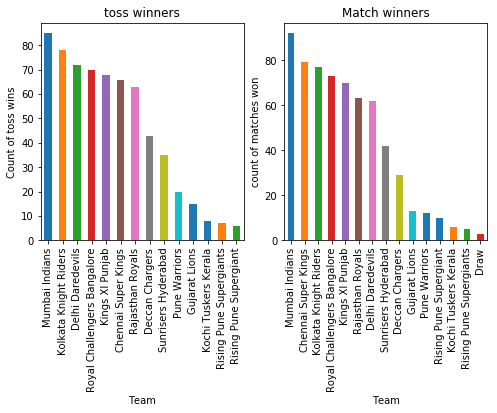

In [35]:
temp1 = matches['toss_winner'].value_counts()
temp2 = matches['winner'].value_counts()


fig = plot.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
temp1.plot(kind='bar')
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")


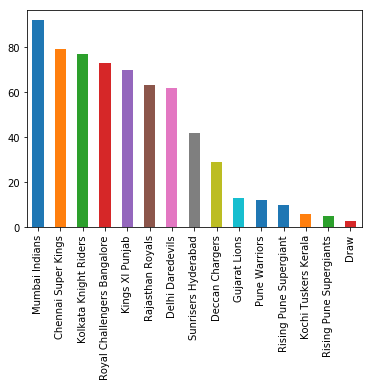

In [36]:
w = matches['winner'].value_counts().plot(kind = 'bar')
w

In [37]:
UData = matches[['team1', 'team2', 'toss_winner',  'toss_decision', 'city', 'venue', 'winner']]

#  Encoding Categorical values of Toss_Decision, Team1, Team2, and Toss_Winner columns

In [38]:
mapping = {'Sunrisers Hyderabad': 1, 'Royal Challengers Bangalore': 2, 'Mumbai Indians':3 , 'Gujarat Lions':4 , 'Rising Pune Supergiant':5 ,'Kolkata Knight Riders': 6,'Delhi Daredevils': 7,'Kings XI Punjab': 8,'Chennai Super Kings': 9,'Rajasthan Royals':10 ,'Deccan Chargers': 11,'Kochi Tuskers Kerala':12 ,'Pune Warriors':13 ,'Rising Pune Supergiants':5 }
tDecision = {'bat':0,'field':1}
draw = {'Draw': 14}


UData = UData.replace({'team1': mapping, 'team2':mapping,'toss_winner': mapping, 'toss_decision': tDecision})


In [39]:
UData= UData.replace({'winner': mapping})
UData

,team1,team2,toss_winner,toss_decision,city,venue,winner
0,1,2,2,1,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",1
1,3,5,5,1,Pune,Maharashtra Cricket Association Stadium,5
2,4,6,6,1,Rajkot,Saurashtra Cricket Association Stadium,6
3,5,8,8,1,Indore,Holkar Cricket Stadium,8
4,2,7,2,0,Bangalore,M Chinnaswamy Stadium,2
5,4,1,1,1,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",1
6,6,3,3,1,Mumbai,Wankhede Stadium,3
7,2,8,2,0,Indore,Holkar Cricket Stadium,8
8,7,5,5,1,Pune,Maharashtra Cricket Association Stadium,7
9,1,3,3,1,Mumbai,Wankhede Stadium,3


# Encoding Categorical values of City and Winner Column

In [40]:
city = {'Hyderabad':1, 'Pune':2, 'Rajkot':3, 'Indore':4, 'Bangalore':5, 'Mumbai':6,
       'Kolkata':7, 'Delhi':8, 'Chandigarh':9, 'Kanpur':10, 'Jaipur':11, 'Chennai':12,
       'Cape Town':13, 'Port Elizabeth':14, 'Durban':15, 'Centurion':16,
       'East London':17, 'Johannesburg':18, 'Kimberley':19, 'Bloemfontein':20,
       'Ahmedabad':21, 'Cuttack':22, 'Nagpur':23, 'Dharamsala':24, 'Kochi':25,
       'Visakhapatnam':26, 'Raipur':27, 'Ranchi':28, 'Abu Dhabi':29, 'Sharjah':30,
       'Dubai':31}

UData = UData.replace({'city': city, 'winner': mapping, 'winner': draw})



# Graphically represntaion of Match Winner And Toss_wiiner after Encoding

Text(0.5, 1.0, 'Match winners')

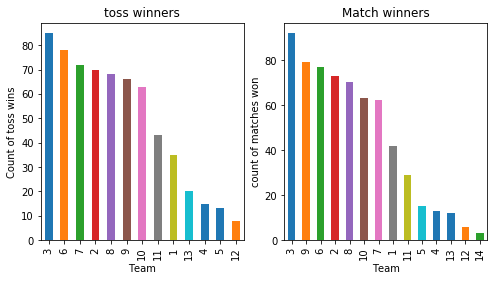

In [41]:
temp1 = UData['toss_winner'].value_counts()
temp2 = UData['winner'].value_counts()


fig = plot.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
temp1.plot(kind='bar')
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

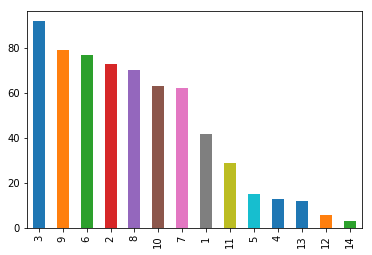

In [42]:
w = UData['winner'].value_counts().plot(kind = 'bar')
w

# Encoding Categorical values of Venue Column

In [43]:
venue = {'Rajiv Gandhi International Stadium, Uppal':1,
       'Maharashtra Cricket Association Stadium':2,
       'Saurashtra Cricket Association Stadium':3, 'Holkar Cricket Stadium':4,
       'M Chinnaswamy Stadium':5, 'Wankhede Stadium':6, 'Eden Gardens':7,
       'Feroz Shah Kotla':8,
       'Punjab Cricket Association IS Bindra Stadium, Mohali':10,
       'Green Park':11, 'Punjab Cricket Association Stadium, Mohali':12,
       'Sawai Mansingh Stadium':13, 'MA Chidambaram Stadium, Chepauk':14,
       'Dr DY Patil Sports Academy':15, 'Newlands':16, "St George's Park":17,
       'Kingsmead':18, 'SuperSport Park':19, 'Buffalo Park':20,
       'New Wanderers Stadium':21, 'De Beers Diamond Oval':22,
       'OUTsurance Oval':23, 'Brabourne Stadium':24,
       'Sardar Patel Stadium, Motera':25, 'Barabati Stadium':26,
       'Vidarbha Cricket Association Stadium, Jamtha':27,
       'Himachal Pradesh Cricket Association Stadium':28, 'Nehru Stadium':29,
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium':30,
       'Subrata Roy Sahara Stadium':31,
       'Shaheed Veer Narayan Singh International Stadium':32,
       'JSCA International Stadium Complex':33, 'Sheikh Zayed Stadium':34,
       'Sharjah Cricket Stadium':35, 'Dubai International Cricket Stadium':36}

UData = UData.replace({'venue': venue})

In [44]:
UData

,team1,team2,toss_winner,toss_decision,city,venue,winner
0,1,2,2,1,1,1,1
1,3,5,5,1,2,2,5
2,4,6,6,1,3,3,6
3,5,8,8,1,4,4,8
4,2,7,2,0,5,5,2
5,4,1,1,1,1,1,1
6,6,3,3,1,6,6,3
7,2,8,2,0,4,4,8
8,7,5,5,1,2,2,7
9,1,3,3,1,6,6,3


# Random Forest Classifier

In [45]:
classifier = RandomForestClassifier(n_estimators=30)
classifier1 =DecisionTreeClassifier()
classifier2 =LogisticRegression()
feature_columns = UData[['team1','team2','toss_winner','toss_decision','venue','city']]
outcome = UData['winner']
outcome.astype('int')

classifier.fit(feature_columns,outcome)
predictions = classifier.predict(feature_columns)
accuracy = metrics.accuracy_score(predictions,outcome)

print('Accuracy is ',accuracy*100)

Accuracy is  88.9937106918239


# Predicting the Winning Team

In [46]:
team1='Sunrisers Hyderabad'
team2='Mumbai Indians'
#toss_winner='Gujarat Lions'
toss_winner='Mumbai Indians'
input=[mapping[team1],mapping[team2],mapping[toss_winner],'1','6','6']
input = np.array(input).reshape((1, -1))
outcome=classifier.predict(input)
print(list(mapping.keys())[list(mapping.values()).index(outcome)],'will Win the match')


Mumbai Indians will Win the match


# DECISION TREE

In [47]:
classifier1 =DecisionTreeClassifier()
feature_columns = UData[['team1','team2','toss_winner','toss_decision','venue','city']]
outcome = UData['winner']
outcome.astype('int')

classifier1.fit(feature_columns,outcome)
predictions = classifier1.predict(feature_columns)
accuracy = metrics.accuracy_score(predictions,outcome)

print('Accuracy is ',accuracy*100)

Accuracy is  89.15094339622641


In [48]:
team1='Sunrisers Hyderabad'
team2='Mumbai Indians'
#toss_winner='Gujarat Lions'
toss_winner='Mumbai Indians'
input=[mapping[team1],mapping[team2],mapping[toss_winner],'1','6','6']
input = np.array(input).reshape((1, -1))
outcome=classifier1.predict(input)
print(list(mapping.keys())[list(mapping.values()).index(outcome)],' Will Win the Match')



Mumbai Indians  Will Win the Match
